# Create


In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *


In [2]:
%matplotlib widget

In [3]:
# ac = 8.1271e-15 # 0.81271 # 8.1271e-15 # scattering radius in m 
# M = 180.948030  # amu of target nucleus
# m = 1           # amu of incident neutron
# I = 3.5         # intrinsic spin, positive parity
# i = 0.5         # intrinsic spin, positive parity
# l_max = 0       # highest order l-wave to consider

# pair = syndat.particle_pair(ac, M, m, I, i, l_max)

# pair.map_quantum_numbers(True)

# average_parameters, parameters = syndat.sammy_interface.read_SAMNDF_PAR('../synthetic_data/Ta181/SAMQUA.PAR')
# # print(average_parameters);# print(parameters)

# # size of these averages must be the same size as Jpi mapping!
# Davg = [list(), list([average_parameters.dE[1],average_parameters.dE[2]])]
# Ggavg = [list(), list([average_parameters.Gg[1],average_parameters.Gg[2]])]
# Gnavg = [list(), list([average_parameters.Gn[1],average_parameters.Gn[2]])]

# RRR_Erange = [10, 50]

# pair.sample_all_Jpi(RRR_Erange, 
#                         Davg, Ggavg, Gnavg,
#                         save_csv = True, 
#                         sammy_run_folder = os.getcwd())

In [4]:
# pair.Jp[0][0]
# ### !!! need to correct the way pair.Jp/Jn are stored so that I can loop through even just a single spin group!
# test = [[3.0, 1, [0.0]],]

# for j in test:
#     print(j[0])
# # for j, resonance_ladder in zip(pair.Jp[0], pair.Jp_resonances):
# #     print(j[0], resonance_ladder)
# resonance_ladder = pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}) 
# test = pair.Jp_resonances






In [5]:

ac = 0.67 #6.7e-15 # 0.81271 # 8.1271e-15 # scattering radius in m 
M = 62.929599  # amu of target nucleus
m = 1           # amu of incident neutron
I = 1.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity
l_max = 0       # highest order l-wave to consider

pair = syndat.particle_pair(ac, M, m, I, i, l_max)


# sammy_calculated = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/verify_slbw/SAMMY_capture.LST')
sammy_cap = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/verify_slbw/cu/SAMMY_capture.LST')
sammy_scat = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/verify_slbw/cu/SAMMY_scat.LST')

In [22]:


E = sammy_cap.E
my_resonance_ladder = [pd.DataFrame({'E':[2105.151608],'Gg':[506.740813], 'Gn':[20317.7426]}), ]
single_spin_group = [[1.0, 1, [0.0]],]

# resonance_ladder = pair.Jp_resonances[0]
# E = sammy_calculated.E[sammy_calculated.E<100] #np.linspace(1,100,1000)
# my_resonance_ladder = [pd.DataFrame({'E':[21.54920000], 'Gg':[82.0092930], '0':[0.23514800]}), ]
# my_resonance_ladder = [pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}), ] # make this a list so it can be looped through
# 41.91070000 124.412524 0.25549100 0.00000000 0.00000000 0 0 0 0 0 1
# single_spin_group = [[3.0, 1, [0.0]],]  # make this a list so it can be looped through

k = syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
P,S,psi = syndat.scattering_theory.P_S_psi_explicit(E, pair.ac, pair.M, pair.m, 0)


xs_cap = 0 

# for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
    # print(j[0], resonance_ladder)
    g = syndat.scattering_theory.g(j[0], pair.I, pair.i)
    xs_cap += syndat.scattering_theory.SLBW_capture(g, k, E, resonance_ladder)



xs_scat = 0 

# for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
    # print(j[0], resonance_ladder)
    g = syndat.scattering_theory.g(j[0], pair.I, pair.i)

    sum1=0; sum2=0; sum3=0; sum4=0
    for index, row in resonance_ladder.iterrows():
        Gn = sum([row[ign] for ign in range(len(row)-2)]) * 1e-3
        Gg = row.Gg * 1e-3
        E_lambda = row.E
        d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
        sum1 += Gn*(Gn+Gg)/d
        sum2 += Gn*(E-E_lambda)/d
        sum3 += (Gn*(E-E_lambda)/d)#**2
        sum4 += (Gn*(Gn+Gg)/(2*d))#**2

    xs_scat += g * ((1-np.cos(2*psi))*(2-sum1) + 2*np.sin(2*psi)*sum2 + sum3**2 + sum4**2)

xs_scat = (np.pi/k**2)*xs_scat

# xs_scat = 0 
# k = syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
# P,S,psi = syndat.scattering_theory.P_S_psi_explicit(E, pair.ac, pair.M, pair.m, 0)
# # for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
# for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
#     # print(j[0], resonance_ladder)
#     g = syndat.scattering_theory.g(j[0], pair.I, pair.i)
#     sum1=0; sum2=0; sum3=0; sum4=0
#     for index, row in resonance_ladder.iterrows():
#         Gn = sum([row[ign] for ign in range(len(row)-2)]) * 1e-3
#         Gg = row.Gg * 1e-3
#         E_lambda = row.E
#         d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
#         sum1 += Gn*(Gn+Gg)/d
#         sum2 += Gn*(E-E_lambda)/d
#         sum3 += Gn*(E-E_lambda)/d
#         sum4 += Gn*(Gn+Gg)/(2*d)
#     xs_scat += g * (1-np.cos(2*psi))*(2-sum1) + 2*np.sin(2*psi)*sum2 + sum3**2 + sum4**2
# xs_scat = (np.pi/k**2)*xs_scat



In [23]:
resonance_ladder

,E,Gg,Gn
0,2105.151608,506.740813,20317.7426


In [7]:
A=62.929599; # Cu-63, number from cu63 input txt file
Constant=0.002197 #sqrt(2Mn)/hbar; units of (10^(-12) cm sqrt(eV)^-1)
Ac= 0.67 ; # scattering radius 6.7 fermi expressed as 10^-12 cm
I=1.5; # target angular Momentum
ii=0.5; # incident angular momentum
l=0;   # l=0 or s-wave spin group

pair = syndat.particle_pair(Ac, A, 1, I, ii, l)

s=I-ii; #
J=l+s; 
g=syndat.scattering_theory.g(J, pair.I, pair.i) #(2*J+1)/( (2*ii+1)*(2*I+1) );   # spin statistical factor g sub(j alpha)
pig=np.pi*g 
k = syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
psi = k*Ac

# initialize and fill synthetic true 'continuous' cross section vector
my_resonance_ladder = [pd.DataFrame({'E':[2105.151608],'Gg':[506.740813], 'Gn':[20317.7426]}), ]
Gn = float(my_resonance_ladder[0].Gn)*1e-3
Gg = float(my_resonance_ladder[0].Gg)*1e-3
E_lambda = float(my_resonance_ladder[0].E)

# True_CrossSection_SLBW = (pig/k**2) * ((Gg*Gn) / ((E-E_lambda)**2+((Gn+Gg)/2)**2))

xs_cap = syndat.scattering_theory.SLBW_capture(g, k, E, my_resonance_ladder[0])

xs_scat = 0
sum1=0; sum2=0; sum3=0; sum4=0
# for index, row in resonance_ladder.iterrows():
#     Gn = sum([row[ign] for ign in range(2,len(row))]) * 1e-3
#     Gg = row.Gg * 1e-3
#     E_lambda = row.E
d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
sum1 += Gn*(Gn+Gg)/d
sum2 += Gn*(E-E_lambda)/d
sum3 += (Gn*(E-E_lambda)/d)
sum4 += (Gn*(Gn+Gg)/(2*d))

xs_scat = g * ((1-np.cos(2*psi))*(2-sum1) + 2*np.sin(2*psi)*sum2 + sum3**2 + sum4**2)

xs_scat = (np.pi/k**2)*xs_scat



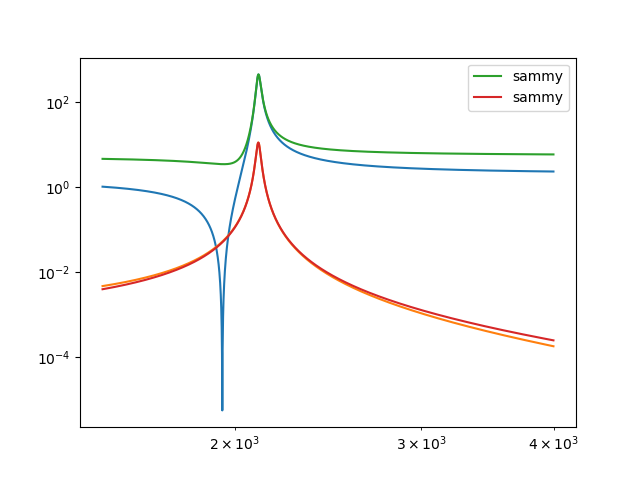

In [8]:
figure()
plot(E, xs_scat)
plot(E,xs_cap)
# plot(E, psi, label='psi')
# plot(E,True_CrossSection_SLBW, '.', label='matlab')
# plot(E, test, label='syndat')
# plot(E, (xs_cap+xs_scat)*1e24)
plot(sammy_scat.E, sammy_scat.theo_xs, label='sammy')
plot(sammy_cap.E, sammy_cap.theo_xs, label='sammy')
xscale('log'); yscale('log')
# xlim([1,1000])
legend()

In [9]:
lst = syndat.sammy_interface.readlst('../synthetic_data/Ta181/postdoc_testdata/sammy1.dat')
lst_trans = syndat.sammy_interface.readlst('../synthetic_data/Ta181/postdoc_testdata/sammy2_trans.dat')


In [35]:
avg, par = syndat.sammy_interface.read_sammy_par('../synthetic_data/Ta181/postdoc_testdata/sammy1.par')
# par

In [32]:
gj = 0.5625
rho = 2.1846e-3
E = lst.E
xs = 0
for row in par.iterrows():
    # print(row[1].E)
    E_lam = row[1].E
    Gg = row[1].Gg*1e-3
    Gn = row[1].Gn*1e-3

    xs += (Gn*Gg*np.sqrt(E/E_lam)) / ( (E-E_lam)**2 + (Gn*np.sqrt(E/E_lam)+Gg)**2/4 )
xs = (np.pi*gj/rho**2)*(1/E)*xs



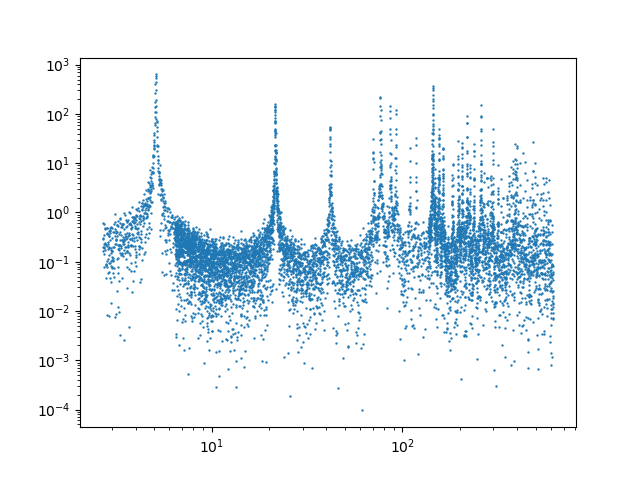

In [34]:

figure()
scatter(lst.E, lst.exp, s=.5)
# scatter(lst_trans.E, lst_trans.exp, s=.5)
# plot(E, xs, 'k')
xscale('log'); yscale('log')